# Data Cleaning and EDA

In [4]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('ca_covid_data.csv', index_col=0)

In [6]:
df.shape

(278, 27)

In [7]:
df.describe()

,cumulative_tests,new_tests,cumulative_cases,cumulative_deaths,new_cases,new_deaths,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,icu_covid_confirmed_patients,icu_suspected_covid_patients,...,nh_new_resident_deaths,beds_ready_to_accept_patients,patients_in_beds,beds_in_warm_status,elderly_cumulative_cases,elderly_proportion_deaths,elderly_new_cases,minority_cumulative_cases,minority_proportion_deaths,minority_new_positives
count,2.770000e+02,2.770000e+02,2.770000e+02,277.000000,277.000000,277.000000,266.000000,266.000000,266.000000,266.000000,...,243.000000,241.000000,241.000000,241.000000,262.000000,242.000000,261.000000,2.510000e+02,251.000000,250.000000
mean,9.725339e+06,1.063725e+05,5.373628e+05,10020.317690,6694.787004,81.563177,4465.703008,1235.206767,1303.394737,195.454887,...,14.366255,575.082988,42.261411,1382.879668,62895.538168,75.470041,717.735632,3.370264e+05,68.537601,4215.180000
std,8.430854e+06,5.482425e+05,4.490298e+05,6783.954219,8366.842926,56.256792,2723.061229,528.973479,570.667056,104.577640,...,13.313512,800.627687,49.830652,818.643618,43407.758732,2.014962,821.091011,2.551362e+05,2.059867,4770.773434
min,6.291000e+03,-5.902816e+06,6.750000e+02,15.000000,218.000000,2.000000,1306.000000,635.000000,544.000000,69.000000,...,-1.000000,-2.000000,0.000000,0.000000,2342.000000,73.500000,128.000000,1.002100e+04,58.930000,351.000000
25%,1.736894e+06,5.229400e+04,9.898000e+04,3884.000000,2175.000000,39.000000,2873.500000,855.750000,937.750000,119.250000,...,4.000000,8.000000,6.000000,0.000000,22762.750000,73.700000,317.000000,8.877750e+04,66.800000,1669.000000
50%,8.305713e+06,1.040690e+05,5.194270e+05,9501.000000,4107.000000,72.000000,3335.500000,1207.500000,1145.000000,173.500000,...,13.000000,204.000000,33.000000,1872.000000,63061.500000,74.300000,432.000000,3.393090e+05,69.700000,2903.000000
75%,1.619134e+07,1.378130e+05,8.500280e+05,16572.000000,7464.000000,106.000000,5494.250000,1416.750000,1636.250000,232.500000,...,19.500000,1509.000000,49.000000,1872.000000,91612.500000,77.600000,697.000000,5.057445e+05,70.000000,4509.500000
max,2.946517e+07,6.763569e+06,1.854456e+06,22593.000000,53711.000000,379.000000,16843.000000,3773.000000,3614.000000,642.000000,...,70.000000,4184.000000,251.000000,1929.000000,189671.000000,79.300000,5162.000000,1.063816e+06,70.600000,34767.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 2020-03-18 to 2020-12-20
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   cumulative_tests                       277 non-null    float64
 1   new_tests                              277 non-null    float64
 2   cumulative_cases                       277 non-null    float64
 3   cumulative_deaths                      277 non-null    float64
 4   new_cases                              277 non-null    float64
 5   new_deaths                             277 non-null    float64
 6   hospitalized_covid_confirmed_patients  266 non-null    float64
 7   hospitalized_suspected_covid_patients  266 non-null    float64
 8   icu_covid_confirmed_patients           266 non-null    float64
 9   icu_suspected_covid_patients           266 non-null    float64
 10  icu_available_beds                     266 non-null    float64


#### Evaluating the nature of null values across columns

In [9]:
df.isna().sum()

cumulative_tests                          1
new_tests                                 1
cumulative_cases                          1
cumulative_deaths                         1
new_cases                                 1
new_deaths                                1
hospitalized_covid_confirmed_patients    12
hospitalized_suspected_covid_patients    12
icu_covid_confirmed_patients             12
icu_suspected_covid_patients             12
icu_available_beds                       12
nh_total_resident_cases                  34
nh_new_resident_cases                    34
nh_total_resident_deaths                 34
nh_total_health_care_worker_cases        34
nh_new_health_care_worker_cases          34
nh_total_health_care_workers_deaths      34
nh_new_resident_deaths                   35
beds_ready_to_accept_patients            37
patients_in_beds                         37
beds_in_warm_status                      37
elderly_cumulative_cases                 16
elderly_proportion_deaths       

<AxesSubplot:>

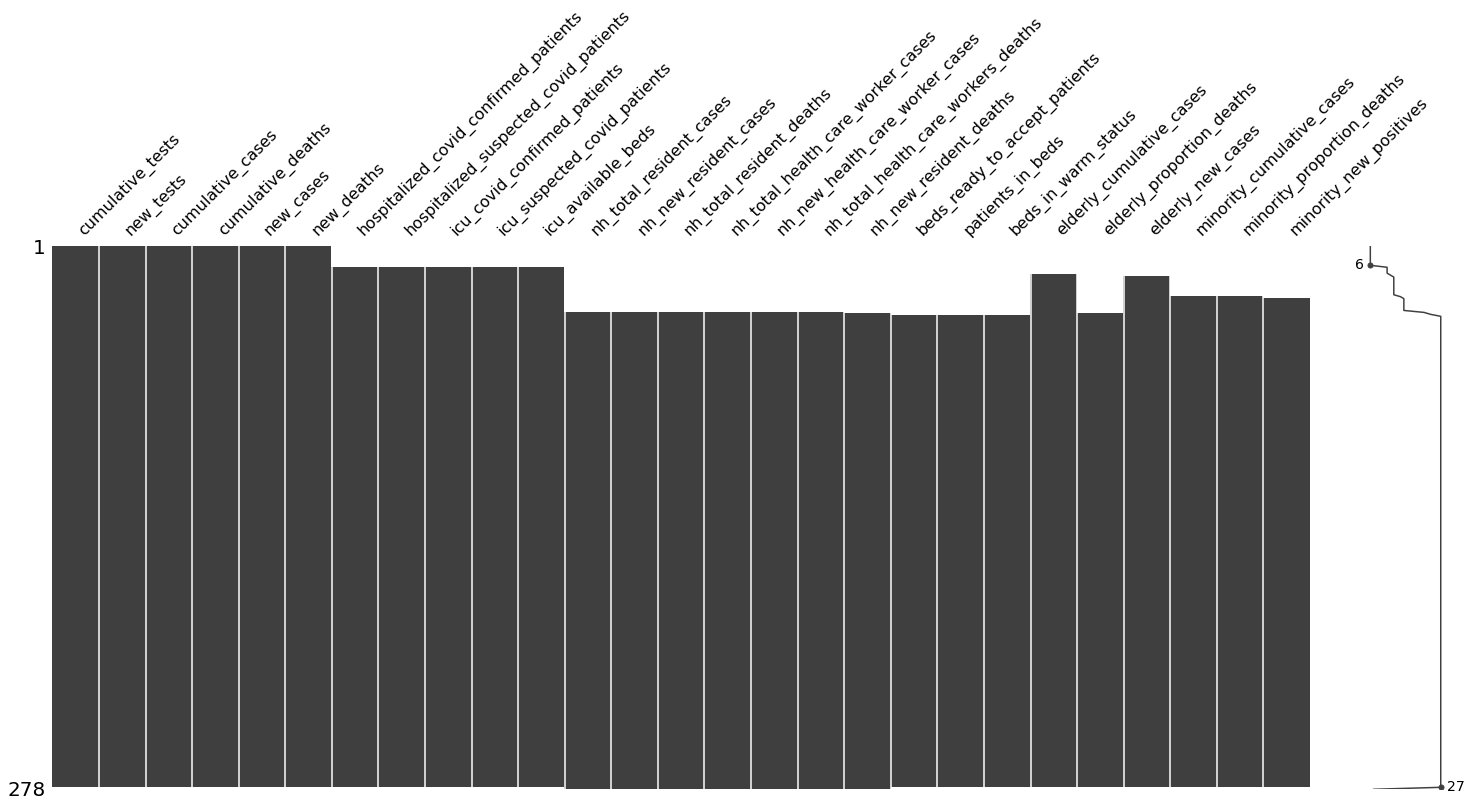

In [10]:
msno.matrix(df)

In [11]:
df.dropna(subset=['cumulative_tests'], inplace=True)

#### Fill all null values with a weighted average corresponding to the number of new cases on a given day

In [12]:
daily_case_weight = df.new_cases/df.new_cases.mean()
for item in df.columns:
    df.fillna({item:(df[item].mean()*daily_case_weight)},inplace= True)

In [13]:
df.isna().sum()

cumulative_tests                         0
new_tests                                0
cumulative_cases                         0
cumulative_deaths                        0
new_cases                                0
new_deaths                               0
hospitalized_covid_confirmed_patients    0
hospitalized_suspected_covid_patients    0
icu_covid_confirmed_patients             0
icu_suspected_covid_patients             0
icu_available_beds                       0
nh_total_resident_cases                  0
nh_new_resident_cases                    0
nh_total_resident_deaths                 0
nh_total_health_care_worker_cases        0
nh_new_health_care_worker_cases          0
nh_total_health_care_workers_deaths      0
nh_new_resident_deaths                   0
beds_ready_to_accept_patients            0
patients_in_beds                         0
beds_in_warm_status                      0
elderly_cumulative_cases                 0
elderly_proportion_deaths                0
elderly_new

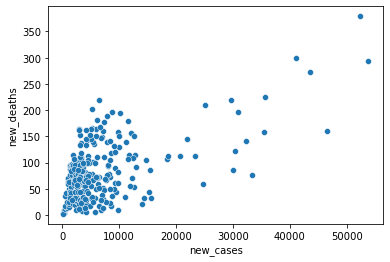

In [24]:
sns.scatterplot(x= 'new_cases', y= 'new_deaths', data= df)
plt.show()

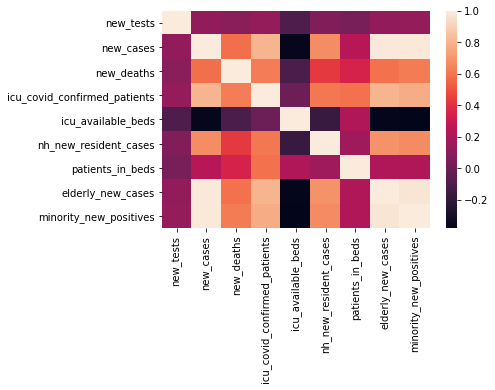

In [15]:
df_corr = df[['new_tests', 'new_cases', 'new_deaths', 'icu_covid_confirmed_patients','icu_available_beds', 'nh_new_resident_cases', 'patients_in_beds', 'elderly_new_cases', 'minority_new_positives']]
sns.heatmap(df_corr.corr())
plt.show()

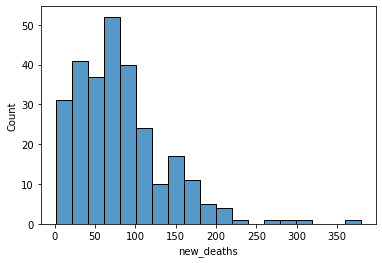

In [16]:
sns.histplot(x= 'new_deaths', data= df)
plt.show()

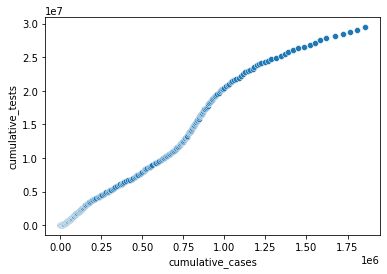

In [23]:
sns.scatterplot(x='cumulative_cases', y='cumulative_tests', data=df)
plt.show()

In [18]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

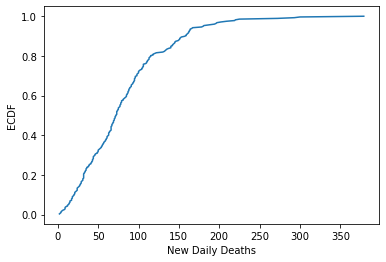

In [19]:
x_ecdf, y_ecdf = ecdf(df['new_deaths'])
plt.plot(x_ecdf, y_ecdf)
plt.xlabel('New Daily Deaths')
plt.ylabel('ECDF')
plt.show()

#### Examine the variance in each column and drop columns where data is too sparse or not appropriate for future models

<ipython-input-20-18f802d69c7b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


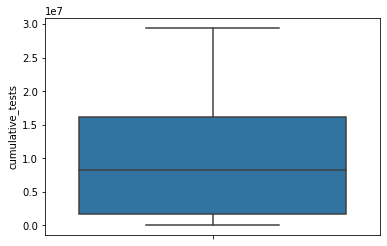

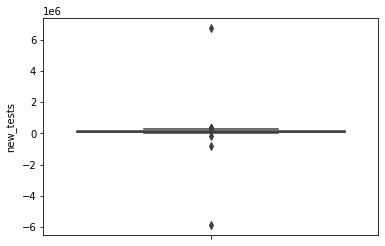

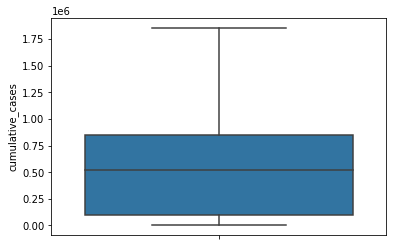

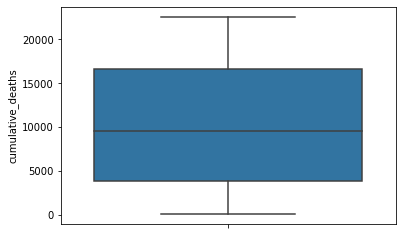

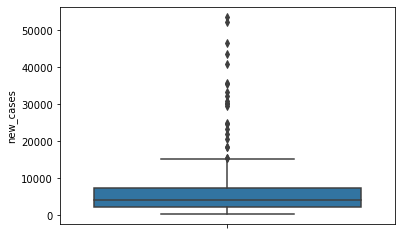

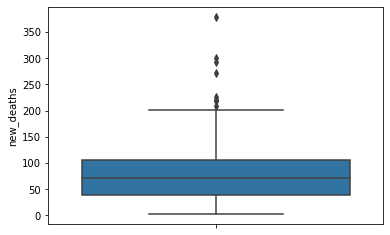

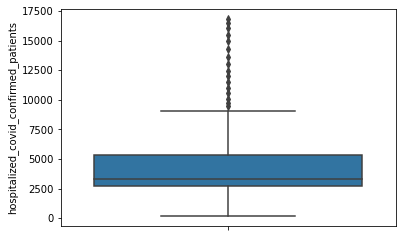

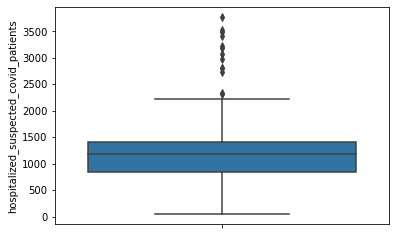

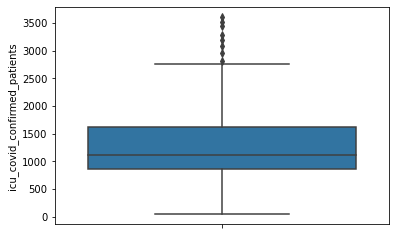

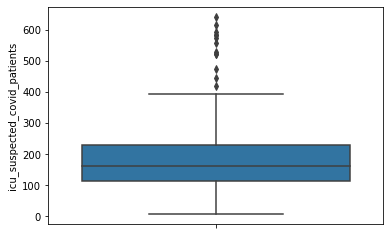

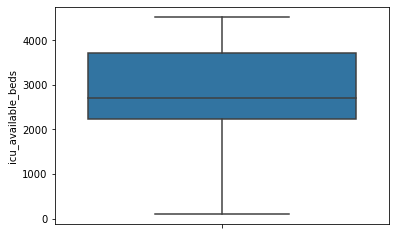

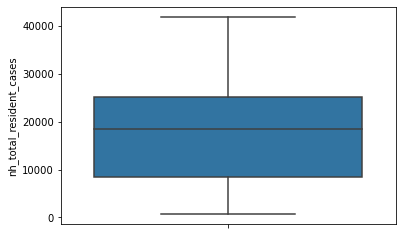

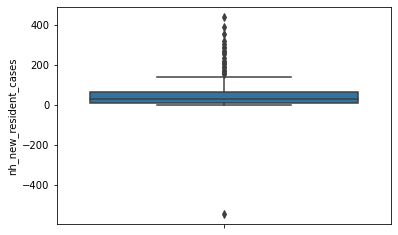

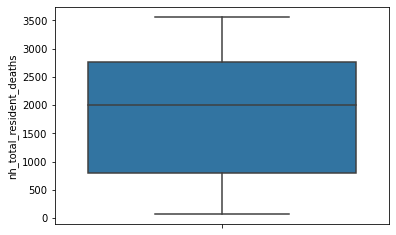

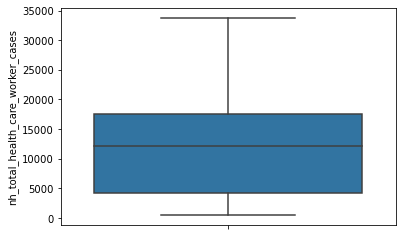

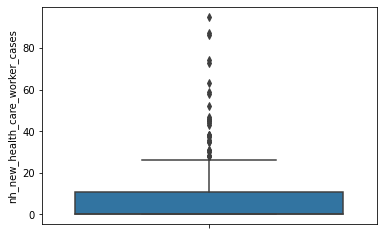

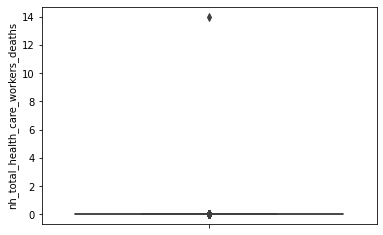

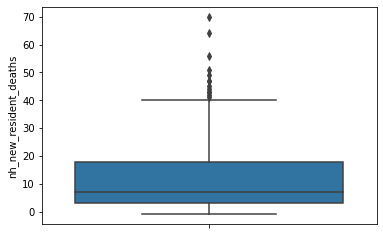

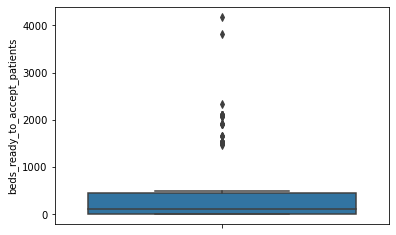

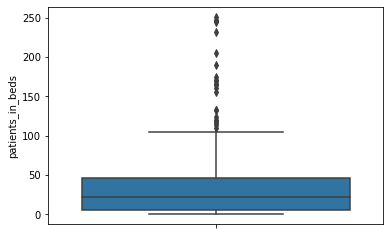

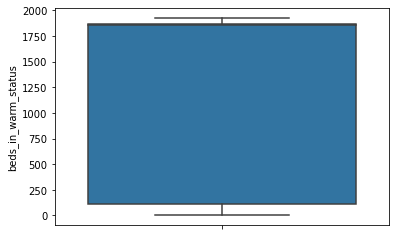

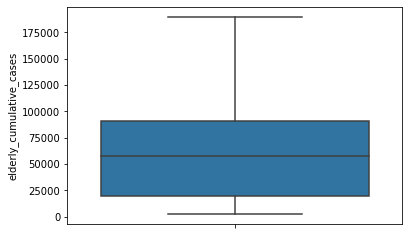

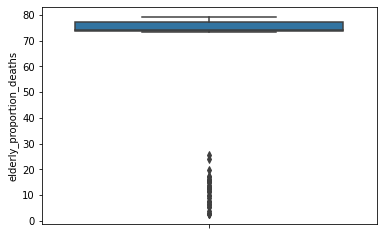

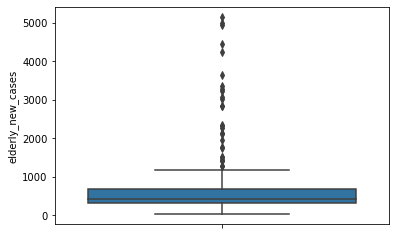

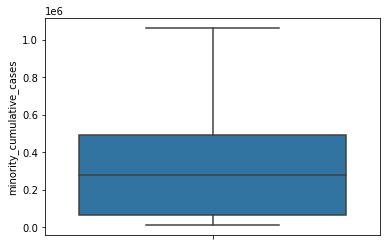

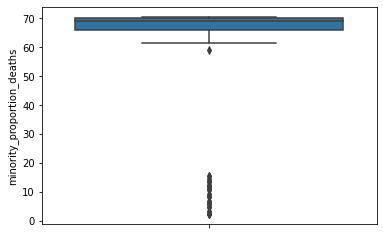

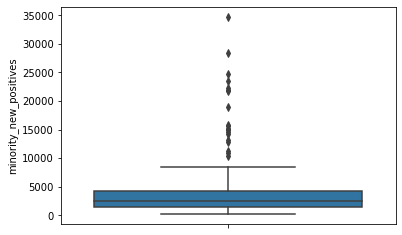

In [20]:
for item in df.columns:
    plt.figure()
    sns.boxplot(y= item, data= df)
plt.show()

In [21]:
df.drop(['nh_total_health_care_workers_deaths', 'beds_in_warm_status', 'elderly_proportion_deaths', 'minority_proportion_deaths'], axis=1, inplace=True)

In [22]:
df.to_csv('ca_covid_data_clean.csv')